In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
batch_size = 32
img_height = 299
img_width = 299
image_size = (img_height, img_width)

In [ ]:
data_dir1 = "/content/drive/MyDrive/Colab Notebooks/Major/Data/train"
data_dir2 = "/content/drive/MyDrive/Colab Notebooks/Major/Data/val"
data_dir3 = "/content/drive/MyDrive/Colab Notebooks/Major/Data/test"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir1,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir2,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir3,
  validation_split=None,
  shuffle=True,
  image_size=(img_height, img_width),
  subset=None,
  seed=123,
  batch_size=batch_size,
  label_mode='categorical'
)

Found 11447 files belonging to 5 classes.
Found 2445 files belonging to 5 classes.
Found 2445 files belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(5, activation = 'softmax'))


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.build(input_shape=(1, img_width, img_height, 3))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_10 (ModuleWra (1, 297, 297, 32)         896       
_________________________________________________________________
module_wrapper_11 (ModuleWra (1, 148, 148, 32)         0         
_________________________________________________________________
module_wrapper_12 (ModuleWra (1, 146, 146, 32)         9248      
_________________________________________________________________
module_wrapper_13 (ModuleWra (1, 73, 73, 32)           0         
_________________________________________________________________
module_wrapper_14 (ModuleWra (1, 71, 71, 32)           9248      
_________________________________________________________________
module_wrapper_15 (ModuleWra (1, 35, 35, 32)           0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (1, 33, 33, 64)          

In [ ]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
# without callbacks
cnn.fit(
    train_ds ,
    epochs=30, 
    validation_data=val_ds, 
)
# callbacks=callbacks_list

Epoch 1/30
358/358 [==============================] - 661s 2s/step - loss: 0.6144 - accuracy: 0.7968 - val_loss: 0.3430 - val_accuracy: 0.8826
Epoch 2/30
358/358 [==============================] - 53s 146ms/step - loss: 0.2596 - accuracy: 0.9073 - val_loss: 0.2998 - val_accuracy: 0.9031
Epoch 3/30
358/358 [==============================] - 53s 146ms/step - loss: 0.1845 - accuracy: 0.9354 - val_loss: 0.2546 - val_accuracy: 0.9268
Epoch 4/30
358/358 [==============================] - 53s 146ms/step - loss: 0.1383 - accuracy: 0.9517 - val_loss: 0.2679 - val_accuracy: 0.9215
Epoch 5/30
358/358 [==============================] - 53s 146ms/step - loss: 0.1120 - accuracy: 0.9617 - val_loss: 0.2736 - val_accuracy: 0.9198
Epoch 6/30
358/358 [==============================] - 53s 146ms/step - loss: 0.0910 - accuracy: 0.9671 - val_loss: 0.3002 - val_accuracy: 0.9276
Epoch 7/30
358/358 [==============================] - 53s 146ms/step - loss: 0.0786 - accuracy: 0.9731 - val_loss: 0.3146 - val_accu

KeyboardInterrupt: ignored

In [ ]:
test_accu = cnn.evaluate(test_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

77/77 [==============================] - 141s 2s/step - loss: 0.3291 - accuracy: 0.9325
The testing accuracy is : 93.25153231620789 %


In [ ]:
pred = cnn.predict(test_ds,verbose=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
print((true_categories), set(true_categories.numpy().argmax(axis=1)))

preds = []
for v in pred:
    x = []
    i = max(v)
    for val in v:
        if val == i:
            x.append(1)
        else:
            x.append(0)
    preds.append(x)

true_categories = true_categories.numpy().argmax(axis=1)
preds = np.array(preds).argmax(axis=1)

77/77 [==============================] - 6s 72ms/step
tf.Tensor(
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]], shape=(2445, 5), dtype=float32) {0, 1, 2, 3, 4}


In [ ]:
cal = [0, 0, 0, 0, 0]
for x in preds:
  cal[x] += 1
print(cal)

cal1 = [0, 0, 0, 0, 0]
for x in true_categories:
  cal1[x] += 1
print(cal1)

[554, 250, 497, 624, 520]
[540, 255, 480, 645, 525]


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

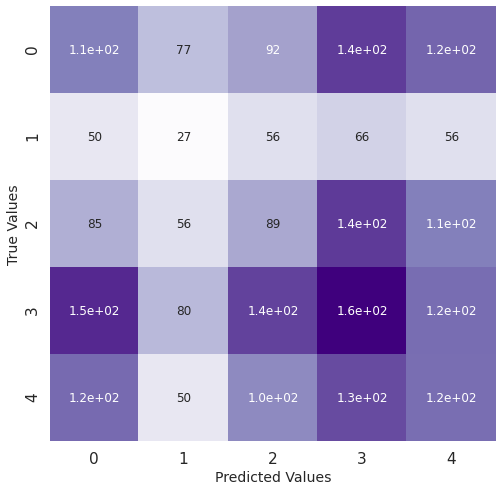

In [ ]:
cm = confusion_matrix(true_categories, preds)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [ ]:
print(classification_report(true_categories, preds))

              precision    recall  f1-score   support

           0       0.22      0.21      0.21       540
           1       0.09      0.11      0.10       255
           2       0.19      0.19      0.19       480
           3       0.26      0.25      0.26       645
           4       0.22      0.22      0.22       525

    accuracy                           0.21      2445
   macro avg       0.20      0.20      0.20      2445
weighted avg       0.21      0.21      0.21      2445



In [ ]:
print(set(preds), set(true_categories))

{0, 1, 2, 3, 4} {0, 1, 2, 3, 4}


In [ ]:
# ///////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////

In [ ]:
#     now with callbacks

In [ ]:
# with callbacks
cnn.fit(
    train_ds ,
    epochs=30, 
    validation_data=val_ds, 
    callbacks=callbacks_list
)

Epoch 1/30
358/358 [==============================] - 53s 146ms/step - loss: 0.8644 - accuracy: 0.7535 - val_loss: 0.4112 - val_accuracy: 0.8589
Epoch 2/30
358/358 [==============================] - 53s 146ms/step - loss: 0.4177 - accuracy: 0.8521 - val_loss: 0.3763 - val_accuracy: 0.8744
Epoch 3/30
358/358 [==============================] - 52s 145ms/step - loss: 0.2948 - accuracy: 0.8961 - val_loss: 0.3396 - val_accuracy: 0.8973
Epoch 4/30
358/358 [==============================] - 53s 146ms/step - loss: 0.2345 - accuracy: 0.9208 - val_loss: 0.3658 - val_accuracy: 0.8928
Epoch 5/30
358/358 [==============================] - 53s 146ms/step - loss: 0.2347 - accuracy: 0.9179 - val_loss: 0.3026 - val_accuracy: 0.9133
Epoch 6/30
358/358 [==============================] - 53s 146ms/step - loss: 0.1740 - accuracy: 0.9388 - val_loss: 0.2849 - val_accuracy: 0.9117
Epoch 7/30
358/358 [==============================] - 53s 146ms/step - loss: 0.1550 - accuracy: 0.9442 - val_loss: 0.2986 - val_ac

In [ ]:
test_accu = cnn.evaluate(test_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

77/77 [==============================] - 8s 92ms/step - loss: 0.2364 - accuracy: 0.9505
The testing accuracy is : 95.05112767219543 %


In [ ]:
pred = cnn.predict(test_ds,verbose=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
# print((true_categories), set(true_categories.numpy().argmax(axis=1)))

preds = []
for v in pred:
    x = []
    i = max(v)
    for val in v:
        if val == i:
            x.append(1)
        else:
            x.append(0)
    preds.append(x)

true_categories = true_categories.numpy().argmax(axis=1)
preds = np.array(preds).argmax(axis=1)

77/77 [==============================] - 6s 71ms/step


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

[[120  50 105 144 121]
 [ 52  36  54  62  51]
 [115  48  98 117 102]
 [136  66 125 178 140]
 [131  50 115 123 106]]


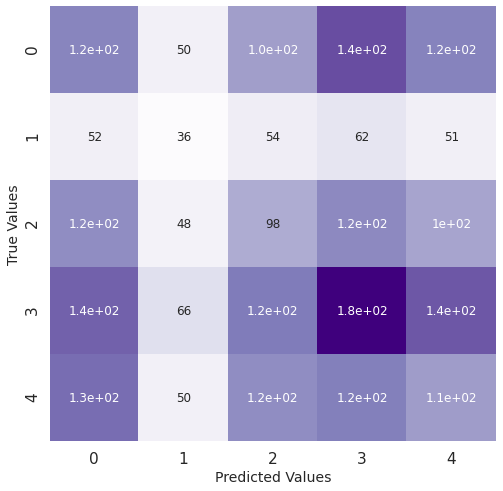

In [ ]:
cm = confusion_matrix(true_categories, preds)
print(cm)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [ ]:
# ///////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////

In [ ]:
# lr plateau on 1, dropout of 0.2

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dropout(0.2))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(5, activation = 'softmax'))


cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 1, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
cnn.build(input_shape=(1, img_width, img_height, 3))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_20 (ModuleWra (1, 297, 297, 32)         896       
_________________________________________________________________
module_wrapper_21 (ModuleWra (1, 148, 148, 32)         0         
_________________________________________________________________
module_wrapper_22 (ModuleWra (1, 146, 146, 32)         9248      
_________________________________________________________________
module_wrapper_23 (ModuleWra (1, 73, 73, 32)           0         
_________________________________________________________________
module_wrapper_24 (ModuleWra (1, 71, 71, 32)           9248      
_________________________________________________________________
module_wrapper_25 (ModuleWra (1, 35, 35, 32)           0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (1, 33, 33, 64)          

In [ ]:
# with callbacks
cnn.fit(
    train_ds ,
    epochs=30, 
    validation_data=val_ds, 
    callbacks=callbacks_list
)

Epoch 1/30
358/358 [==============================] - 113s 313ms/step - loss: 0.8246 - accuracy: 0.7097 - val_loss: 0.5593 - val_accuracy: 0.8033
Epoch 2/30
358/358 [==============================] - 53s 147ms/step - loss: 0.6197 - accuracy: 0.7814 - val_loss: 0.7913 - val_accuracy: 0.7611

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 3/30
358/358 [==============================] - 53s 146ms/step - loss: 0.5467 - accuracy: 0.8057 - val_loss: 0.4481 - val_accuracy: 0.8458
Epoch 4/30
358/358 [==============================] - 53s 146ms/step - loss: 0.4060 - accuracy: 0.8575 - val_loss: 0.3722 - val_accuracy: 0.8777
Epoch 5/30
358/358 [==============================] - 53s 147ms/step - loss: 0.3323 - accuracy: 0.8862 - val_loss: 0.3510 - val_accuracy: 0.8924
Epoch 6/30
358/358 [==============================] - 53s 146ms/step - loss: 0.2857 - accuracy: 0.8982 - val_loss: 0.3128 - val_accuracy: 0.8990
Epoch 7/30
358/358 [============================

In [ ]:
test_accu = cnn.evaluate(test_ds)
print('The testing accuracy is :',test_accu[1]*100, '%')

77/77 [==============================] - 8s 93ms/step - loss: 0.2279 - accuracy: 0.9337
The testing accuracy is : 93.3742344379425 %


In [ ]:
pred = cnn.predict(test_ds,verbose=1)
true_categories = tf.concat([y for x, y in test_ds], axis=0)
# print((true_categories), set(true_categories.numpy().argmax(axis=1)))

preds = []
for v in pred:
    x = []
    i = max(v)
    for val in v:
        if val == i:
            x.append(1)
        else:
            x.append(0)
    preds.append(x)

true_categories = true_categories.numpy().argmax(axis=1)
preds = np.array(preds).argmax(axis=1)

77/77 [==============================] - 6s 71ms/step


[[130  51 117 130 112]
 [ 51  27  50  71  56]
 [ 99  56  94 136  95]
 [159  61 120 173 132]
 [116  56  96 138 119]]


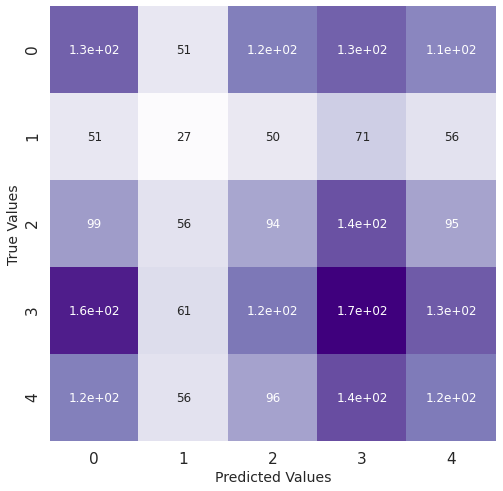

In [ ]:
cm = confusion_matrix(true_categories, preds)
print(cm)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [ ]:
print(classification_report(true_categories, preds))

              precision    recall  f1-score   support

           0       0.23      0.24      0.24       540
           1       0.11      0.11      0.11       255
           2       0.20      0.20      0.20       480
           3       0.27      0.27      0.27       645
           4       0.23      0.23      0.23       525

    accuracy                           0.22      2445
   macro avg       0.21      0.21      0.21      2445
weighted avg       0.22      0.22      0.22      2445



In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Major/Data/test/COVID"

In [ ]:
!find "/content/drive/MyDrive/Colab Notebooks/Major/Data" -type f | wc -l

16337


In [ ]:
# a = len(np.concatenate([i for x, i in train_ds], axis=0))
# b = len(np.concatenate([i for x, i in test_ds], axis=0))
# c = len(np.concatenate([i for x, i in val_ds], axis=0))

# print(a+b+c)